## Question 1

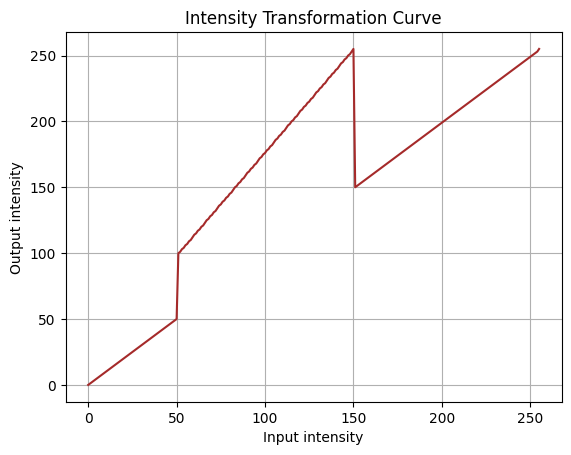

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# Create the transformation based on control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')   # from (0, 0) to (50, 50)
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')  # from (50, 50) to (50, 100)
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')  # from (50, 100) to (150, 255)
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')  # from (150, 255) to (150, 150)
t5 = np.linspace(c[3, 1], 255, 255 - c[3, 0]).astype('uint8')  # from (150, 150) to (255, 255)

# Concatenate to form the full transformation function
transform = np.concatenate((t1, t2, t3, t4, t5))

# Plot the transformation function
plt.plot( transform, color='brown')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.title('Intensity Transformation Curve')
plt.grid(True)
plt.show()
